In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression as LinearRegression
from sklearn.linear_model import SGDRegressor as SGD
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
dir = os.getcwd()
Weather = pd.read_csv(dir + '/Summary of Weather.csv')
Stations = pd.read_csv(dir + '/Weather Station Locations.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
weather = pd.DataFrame(Weather)
locations = pd.DataFrame(Stations)

In [4]:
weather.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
locations.head()

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333


In [6]:
weather.sort_values('STA')

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
775,10001,1944-8-15,T,NaN,27.222222,22.222222,24.444444,0.0,1,44,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
774,10001,1944-8-14,2.794,NaN,27.777778,21.666667,24.444444,0.0,1,44,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
773,10001,1944-8-13,T,NaN,28.888889,21.111111,25.000000,0.0,1,44,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
772,10001,1944-8-12,T,NaN,29.444444,21.111111,26.111111,0.0,1,44,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118757,82506,1945-2-20,0,NaN,28.888889,20.000000,24.444444,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118756,82506,1945-2-19,0,NaN,33.888889,20.000000,26.666667,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118755,82506,1945-2-18,0,NaN,31.111111,20.000000,25.555556,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118831,82506,1945-5-7,0,NaN,23.888889,15.000000,19.444444,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
locations.value_counts("WBAN")

WBAN
10001    1
32907    1
34002    1
34003    1
34005    1
        ..
22507    1
22508    1
22509    1
30001    1
82506    1
Length: 161, dtype: int64

In [8]:
weather.value_counts("STA")

STA
22508    2192
10701    2185
22502    2154
22504    2118
10803    1750
         ... 
42206      50
33123      47
43307      46
34101      31
33121      13
Length: 159, dtype: int64

In [9]:
locations.count()

WBAN                161
NAME                161
STATE/COUNTRY ID    161
LAT                 161
LON                 161
ELEV                161
Latitude            161
Longitude           161
dtype: int64

In [10]:
weather.count()

STA            119040
Date           119040
Precip         119040
WindGustSpd       532
MaxTemp        119040
MinTemp        119040
MeanTemp       119040
Snowfall       117877
PoorWeather     34237
YR             119040
MO             119040
DA             119040
PRCP           117108
DR                533
SPD               532
MAX            118566
MIN            118572
MEA            118542
SNF            117877
SND              5563
FT                  0
FB                  0
FTI                 0
ITH                 0
PGT               525
TSHDSBRSGF      34237
SD3                 0
RHX                 0
RHN                 0
RVG                 0
WTE                 0
dtype: int64

In [11]:
w_to_drop = [
            
'Date',          
'Precip',         
'WindGustSpd',                      
'PoorWeather',     
'YR',     
'DA', 
'PRCP',
'DR',  
'SPD', 
'MAX',
'MIN',
'MEA',
'SNF',
'SND',  
'FT',    
'FB',   
'FTI',  
'ITH', 
'PGT',
'TSHDSBRSGF',
'SD3',    
'RHX',   
'RHN',  
'RVG', 
'WTE']

In [12]:
weather.drop(w_to_drop, inplace=True, axis=1)

In [13]:
weather.drop("Snowfall", 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [47]:
weather.head()

,STA,MaxTemp,MinTemp,MeanTemp,MO
0,10001,25.555556,22.222222,23.888889,7
1,10001,28.888889,21.666667,25.555556,7
2,10001,26.111111,22.222222,24.444444,7
3,10001,26.666667,22.222222,24.444444,7
4,10001,26.666667,21.666667,24.444444,7


In [14]:
locations.head()

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333


In [15]:
l_to_drop = [
'NAME',
'STATE/COUNTRY ID',
'LAT',
'LON',
'Latitude',
'Longitude'
]

In [16]:
locations.drop(l_to_drop, inplace=True, axis=1)

In [17]:
locations.rename(columns={'WBAN': 'STA'}, inplace=True)

In [18]:
locations.head()

,STA,ELEV
0,33013,611
1,33031,88
2,33023,23
3,33044,754
4,12001,443


In [19]:
df = pd.merge(weather, locations, on=['STA'])

In [20]:
df.head()

,STA,MaxTemp,MinTemp,MeanTemp,MO,ELEV
0,10001,25.555556,22.222222,23.888889,7,62
1,10001,28.888889,21.666667,25.555556,7,62
2,10001,26.111111,22.222222,24.444444,7,62
3,10001,26.666667,22.222222,24.444444,7,62
4,10001,26.666667,21.666667,24.444444,7,62


In [21]:
df.drop("STA", 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [22]:
df.std()

MaxTemp        8.717817
MinTemp        8.334572
MeanTemp       8.297982
MO             3.425561
ELEV        1696.652854
dtype: float64

In [23]:
df.mean()

MaxTemp      27.045111
MinTemp      17.789511
MeanTemp     22.411631
MO            6.726016
ELEV        416.380385
dtype: float64

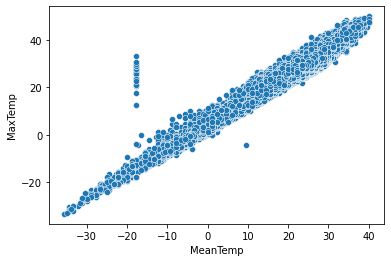

In [24]:
sns.scatterplot(x="MeanTemp", y="MaxTemp", data=df)

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text major ticklabel objects>)

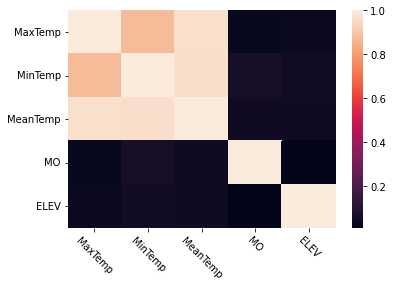

In [25]:
sns.heatmap(df.corr())
plt.xticks(rotation=-45)

In [26]:
y = df['MaxTemp']
X = df.drop(columns=['MaxTemp'])

In [27]:
y

0         25.555556
1         28.888889
2         26.111111
3         26.666667
4         26.666667
            ...    
119035    28.333333
119036    29.444444
119037    28.333333
119038    28.333333
119039    29.444444
Name: MaxTemp, Length: 119040, dtype: float64

In [28]:
X

,MinTemp,MeanTemp,MO,ELEV
0,22.222222,23.888889,7,62
1,21.666667,25.555556,7,62
2,22.222222,24.444444,7,62
3,22.222222,24.444444,7,62
4,21.666667,24.444444,7,62
...,...,...,...,...
119035,18.333333,23.333333,12,2
119036,18.333333,23.888889,12,2
119037,18.333333,23.333333,12,2
119038,18.333333,23.333333,12,2


In [29]:
y_arr = pd.DataFrame(y).to_numpy()
X_arr = pd.DataFrame(X).to_numpy()

In [30]:
from sklearn.preprocessing import StandardScaler
df_scaledY = StandardScaler()
df_scaledY.fit(y_arr)
df_scaledY.transform(y_arr)
df_scaledY.fit_transform(y_arr)
df_scaledX = StandardScaler()
df_scaledX.fit(X_arr)
df_scaledX.transform(X_arr)
df_scaledX.fit_transform(X_arr)

array([[ 0.53184859,  0.1780269 ,  0.07998244, -0.20887117],
       [ 0.46519155,  0.37887979,  0.07998244, -0.20887117],
       [ 0.53184859,  0.24497787,  0.07998244, -0.20887117],
       ...,
       [ 0.06524931,  0.11107594,  1.53960368, -0.24423507],
       [ 0.06524931,  0.11107594,  1.53960368, -0.24423507],
       [-0.06806477,  0.11107594,  1.53960368, -0.24423507]])

In [31]:
sgd_y = df_scaledY.fit_transform(y_arr)

In [32]:
sgd_X = df_scaledX.fit_transform(X_arr)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
sgd_X_train, sgd_X_test, sgd_y_train, sgd_y_test = train_test_split(sgd_X, sgd_y, test_size=0.2)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
sgd = SGD()
sgd.fit(sgd_X_train, sgd_y_train)

In [37]:
y_pred = regressor.predict(X_test)
print(y_pred)

[28.25027802 31.23306331 26.97564564 ... 27.18601282 30.96900091
 32.16229452]


In [38]:
y_sgd_pred = sgd.predict(sgd_X_test)
print(y_sgd_pred)

[-1.40641966  0.67260821  0.46809999 ...  0.41178427  0.34769131
  0.10154404]


In [39]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

0.9878547027361854

In [40]:
from sklearn.metrics import r2_score
r2_score(y_sgd_pred, sgd_y_test)

0.985384695278561

In [41]:
regressor.coef_

array([-8.75527599e-01,  1.86719359e+00, -2.99238203e-03, -2.56420115e-06])

In [42]:
regressor.intercept_

0.7953148485523442

In [43]:
sgd.coef_

array([-8.42421272e-01,  1.78642950e+00,  2.45550962e-04, -1.24284040e-03])

In [44]:
sgd.intercept_

array([-0.0005799])

In [46]:
data = df_scaledY.inverse_transform(y_sgd_pred.reshape(-1, 1))
data

array([[14.78425368],
       [32.90876128],
       [31.12590362],
       ...,
       [30.63495557],
       [30.07620723],
       [27.93034947]])